In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

### Overview of data

In [43]:
df = pd.read_csv('../data/diamonds_train.csv')

In [36]:
df.shape

(40455, 10)

In [4]:
# exploring the data set
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [6]:
# main statistics
df.describe().round(2)

,carat,depth,table,price,x,y,z
count,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00,40455.00
mean,0.80,61.75,57.45,3928.44,5.73,5.73,3.54
std,0.48,1.43,2.23,3992.42,1.12,1.15,0.70
min,0.20,43.00,43.00,326.00,0.00,0.00,0.00
25%,0.40,61.00,56.00,945.00,4.71,4.72,2.91
50%,0.70,61.80,57.00,2397.00,5.69,5.71,3.52
75%,1.04,62.50,59.00,5331.00,6.54,6.54,4.04
max,4.50,79.00,95.00,18823.00,10.23,58.90,8.06


In [10]:
# null values. There are not null values.
df.isna().count()

carat      40455
cut        40455
color      40455
clarity    40455
depth      40455
table      40455
price      40455
x          40455
y          40455
z          40455
dtype: int64

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


### Machine Learning: Regression Try 1

In [18]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric

,carat,depth,table,price,x,y,z
0,1.21,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,63.0,57.0,505,4.35,4.38,2.75
2,0.71,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,63.8,56.0,738,4.68,4.72,3.00
4,1.02,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...
40450,1.34,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,61.9,54.3,456,4.45,4.47,2.76


In [25]:
# defining feature and target cols.
feature_cols = ['carat', 'depth', 'table']
target_col = 'price'

In [26]:
# definig X and y with just numeric columns
X = df_numeric[feature_cols]
y = df_numeric[target_col]

In [27]:
# makings the train and test division
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30341, 3), (30341,), (10114, 3), (10114,))

In [29]:
# training the algorithm
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True) # not 0 values at the beginning
model.fit(X_train, y_train)

model

LinearRegression()

In [30]:
# coef and intercept
model.coef_, model.intercept_

(array([7847.44574672, -157.27789154, -106.06088961]), 13472.57244978875)

In [31]:
# testing our algorithm and predicting the prices
y_pred = model.predict(X_test)

y_pred

array([ 2779.92339507,  2891.09156514,   540.56249899, ...,
       10631.89624117,  9545.27696792,  7830.69754662])

In [32]:
# checking the error

from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.8540218818207139

### Data Cleaning and Pre-processing

#### Adding a volume column

In [44]:
df['volume'] = df['x']*df['y']*df['z']

df.drop(['x', 'y', 'z'], axis=1, inplace=True)

df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,168.429975


#### Outlier analysis

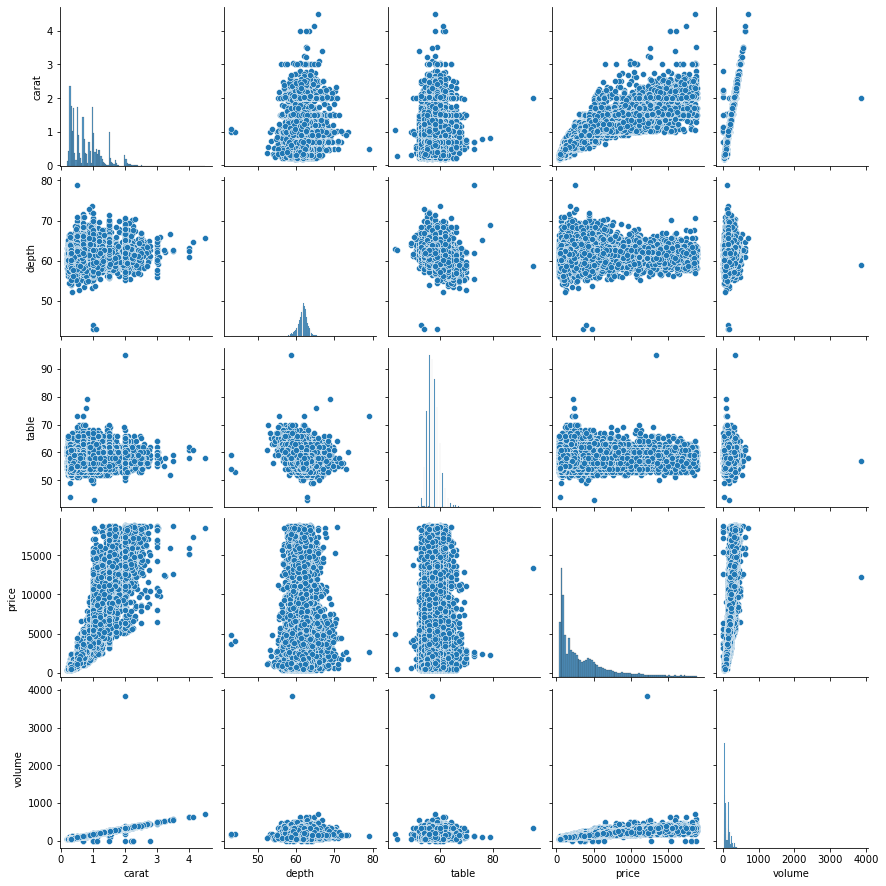

In [45]:
sns.pairplot(df)

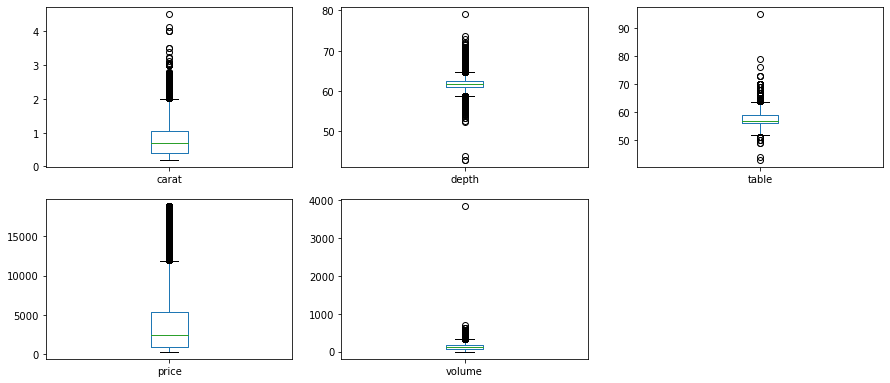

In [46]:
df.plot(kind='box', figsize=(15,10), subplots=True, layout=(3,3))
plt.show()

In [51]:
# function to delete the outliers

def remove_outliers(var):
    a = []
    
    q1 = df[var].quantile(.25)
    q2 = df[var].quantile(.5)
    q3 = df[var].quantile(.75)
    
    iqr = q3-q1
    
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))
    
    for i in df[var]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
        
    return a

In [52]:
# applying the function
for col in df.select_dtypes(exclude='object').columns:
    df[col] = remove_outliers(col)

In [61]:
# completing the outliets with mean values
for i in df.select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(df[i].mean())

In [62]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64

#### Label encoding categorical data

In [63]:
from sklearn import preprocessing

In [64]:
label_encoder = preprocessing.LabelEncoder()

In [65]:
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])
df['clarity'] = label_encoder.fit_transform(df['clarity'])

In [66]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,1.21,3,6,5,62.400000,58.0,4268.0,197.096725
1,0.32,4,4,5,63.000000,57.0,505.0,52.395750
2,0.71,0,3,4,61.777135,55.0,2686.0,113.436890
3,0.41,1,0,2,63.800000,56.0,738.0,66.268800
4,1.02,2,3,2,60.500000,59.0,4882.0,168.429975


### Regression Try 2

In [67]:
# creating X and y 
X = df.drop(['price'], 1)
y = df['price']

In [69]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
# training the model
regr = LinearRegression()
model = regr.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Error Metrics

In [73]:
# error of the model
r2_score(y_true=y_test, y_pred=y_pred)

0.7086236682935538

In [74]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2065261.7002230813

In [75]:
#RMSE: 1.437$ average wrong in our prediction. (Debemos llegar a unos 500$)
mean_squared_error(y_test, y_pred)**0.5

1437.1018405885789

In [76]:
#MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

798.8609810240005

#### Improving the results using Random Forest

In [90]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [91]:
# errors metric
print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 841.4100125395089
R2  : 0.9487446024603671


In [92]:
# evaluating the model
rf.score(X_test, y_test)

0.90011632069768